In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
import joblib  # Para guardar el scaler

# 1 Cargar datos del csv
data = pd.read_csv('27SujetosLecturasEMG/S25_2000_LecturasTrain.csv', header=None)
X = data.values  # 10000 muestras x 10 características

# Se especifican rangos
y = np.zeros(10000)
y[1:2000] = 0    # Movimiento 1 (reposo)
y[2001:4000] = 1 # Movimiento 2 (Abduccion de los dedos)
y[4001:6000] = 2 # Movimiento 3 (Dedos flexionados juntos)
y[6001:8000] = 3 # Movimiento 4 (señala con índice)
y[8001:10000] = 4 # Movimiento 5 (envoltura media)


# Convertir etiquetas a one-hot encoding
y = to_categorical(y)

# 2 Se divide conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3 Se normalizan los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4 Arquitectura de la red neuronal
model = Sequential([
    # Capa de entrada (30 neuronas, función tansig)
    Dense(30, activation='tanh', input_shape=(10,),
          kernel_initializer='glorot_uniform', bias_initializer='zeros',
          kernel_regularizer=l2(0.002)),  # L2 ligero
    Dropout(0.25),  # 25% de dropout
    
    # Capa oculta (15 neuronas, función tansig)
    Dense(15, activation='tanh',
          kernel_initializer='glorot_uniform', bias_initializer='zeros',
          kernel_regularizer=l2(0.001)),  # L2 más ligero
    Dropout(0.2),  # 20% de dropout
    
    # Capa de salida (5 neuronas, función logsig)
    Dense(5, activation='sigmoid',
          kernel_initializer='glorot_uniform', bias_initializer='zeros')
])

# 5  Tasa de aprendizaje ajustable
learning_rate = 0.001 
optimizer = Adam(learning_rate=learning_rate)

# 6 Se compila el modelo
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 7. Se entrena el modelo
batch_size = 32     # Procesara 32 muestras a la vez
epochs = 100       

history = model.fit(X_train, y_train,
                   batch_size=batch_size,
                   epochs=epochs,
                   validation_data=(X_test, y_test),
                   verbose=1)

# 8. Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Precisión en el conjunto de prueba: {accuracy*100:.2f}%')



C:\Users\YaTuSabes\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4585 - loss: 1.3611 - val_accuracy: 0.8295 - val_loss: 0.6755
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8038 - loss: 0.6965 - val_accuracy: 0.8640 - val_loss: 0.4775
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8488 - loss: 0.5339 - val_accuracy: 0.8910 - val_loss: 0.3846
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8765 - loss: 0.4445 - val_accuracy: 0.9045 - val_loss: 0.3349
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8850 - loss: 0.4097 - val_accuracy: 0.9260 - val_loss: 0.2977
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8908 - loss: 0.3872 - val_accuracy: 0.9335 - val_loss: 0.2757
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9014 - loss: 0.3573 - val_accuracy: 0.9365 - val_loss: 0.2606
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9111 - loss: 0.3306 - val_accu

86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


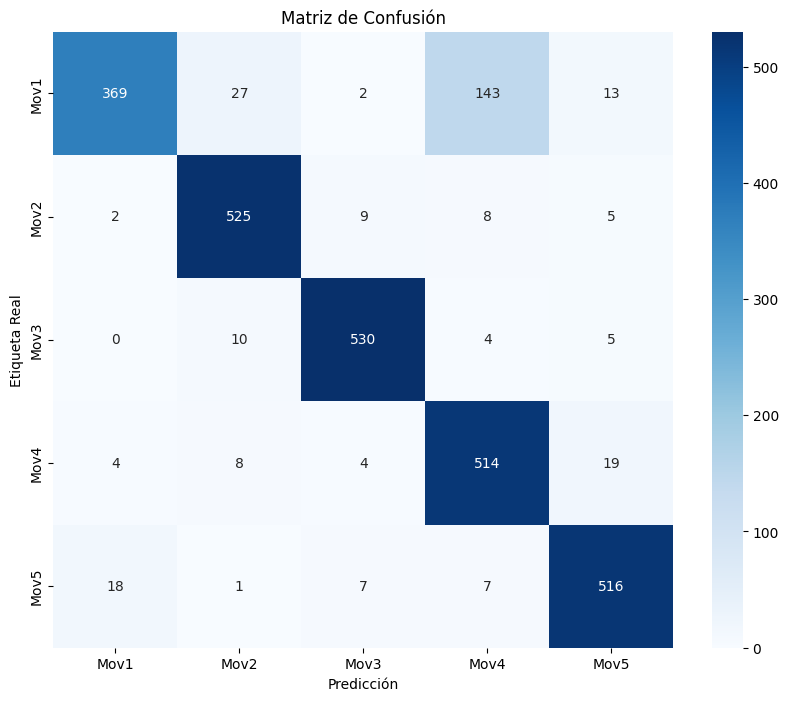


Reporte de Clasificación:
              precision    recall  f1-score   support

        Mov1       0.94      0.67      0.78       554
        Mov2       0.92      0.96      0.94       549
        Mov3       0.96      0.97      0.96       549
        Mov4       0.76      0.94      0.84       549
        Mov5       0.92      0.94      0.93       549

    accuracy                           0.89      2750
   macro avg       0.90      0.89      0.89      2750
weighted avg       0.90      0.89      0.89      2750


Precisión Global: 89.24%


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model


test_data = pd.read_csv('27SujetosLecturasEMG/S25_550_LecturasTest.csv', header=None)
X_test = test_data.values

y_test = np.zeros(2750)  #2750 muestras en total
y_test[1:550] = 0        # Movimiento 1 (reposo)
y_test[551:1100] = 1     # Movimiento 2 (Abducción de los dedos)
y_test[1101:1650] = 2    # Movimiento 3 (dedos flexionados)
y_test[1651:2200] = 3    # Movimiento 4 (señala con índice)
y_test[2201:2750] = 4    # Movimiento 5 (envoltura media)


X_test = scaler.transform(X_test)  

#  predicciones
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

#  matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# grafica
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Mov1', 'Mov2', 'Mov3', 'Mov4', 'Mov5'],
            yticklabels=['Mov1', 'Mov2', 'Mov3', 'Mov4', 'Mov5'])
plt.title('Matriz de Confusión')
plt.ylabel('Etiqueta Real')
plt.xlabel('Predicción')
plt.show()


print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_classes, 
                           target_names=['Mov1', 'Mov2', 'Mov3', 'Mov4', 'Mov5']))

# 8. Precisión general
accuracy = np.sum(y_pred_classes == y_test) / len(y_test)
print(f"\nPrecisión Global: {accuracy*100:.2f}%")